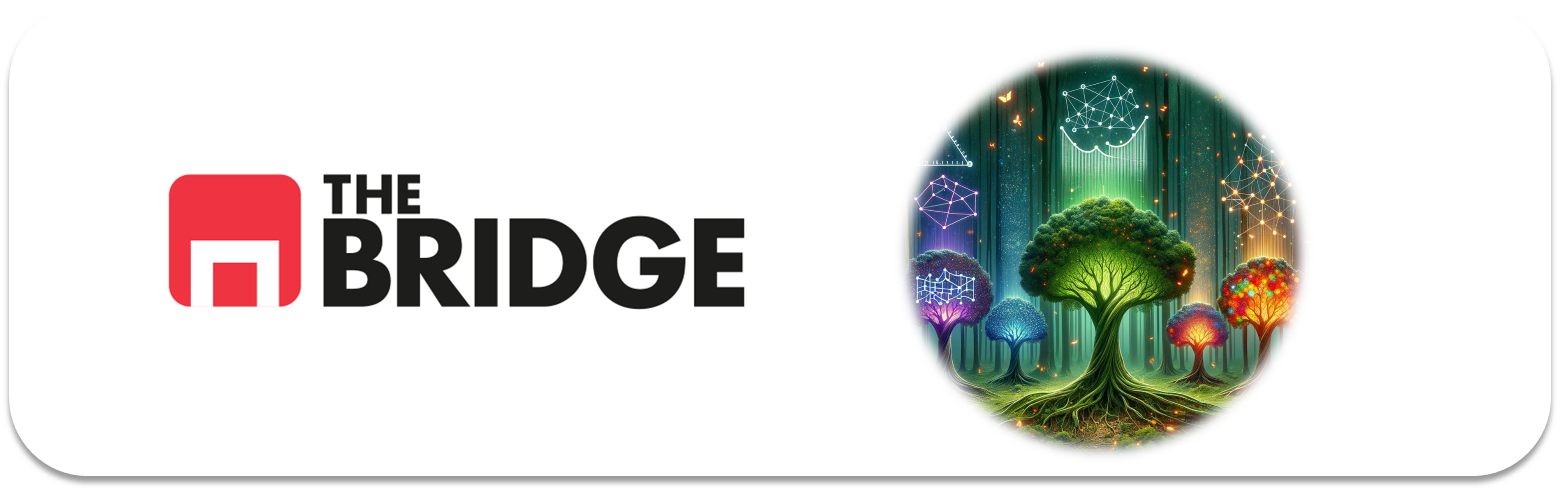

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [84]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_relationship_fin, plot_categorical_numerical_relationship, plot_combined_graphs, plot_grouped_histograms, grafico_dispersion_con_correlacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [20]:
df = pd.read_csv('data/bank-full.csv', sep=';')

In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


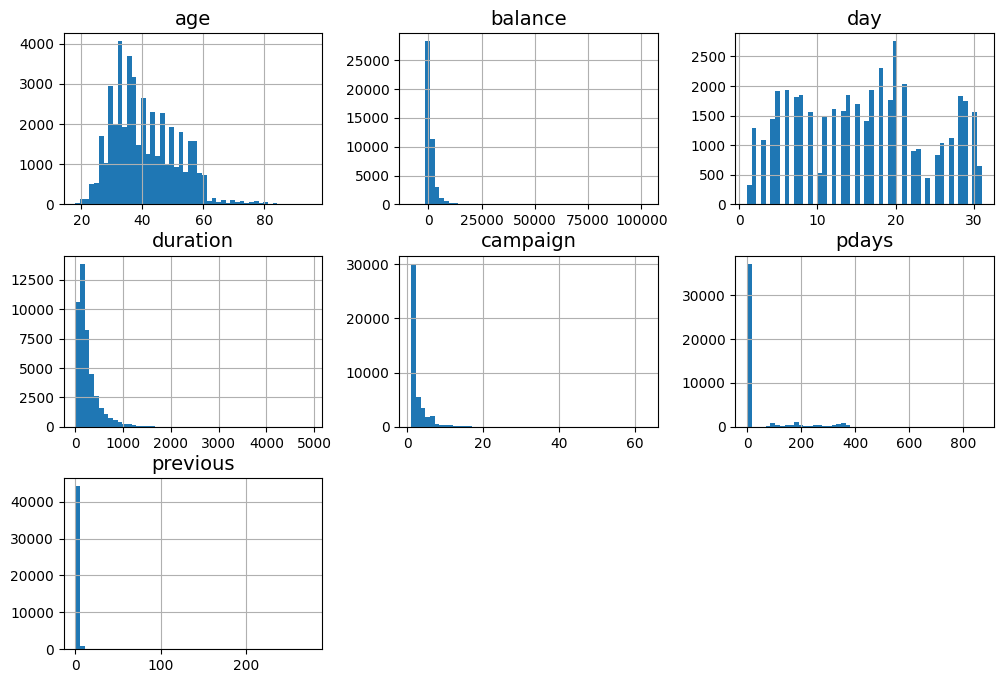

In [27]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

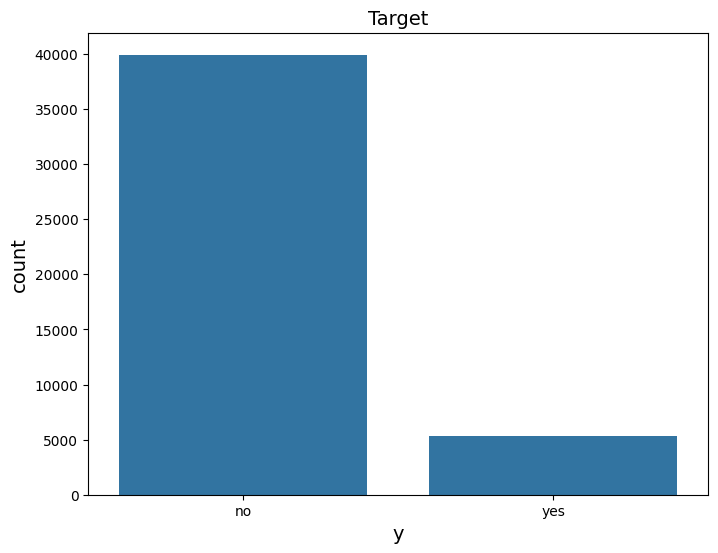

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Target')
plt.show()

In [44]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [45]:
df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [46]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [47]:
df.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [48]:
df.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [49]:
df.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [50]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [51]:
df.month.value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [52]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [53]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [54]:
len(train_set)

36168

In [55]:
len(test_set)

9043

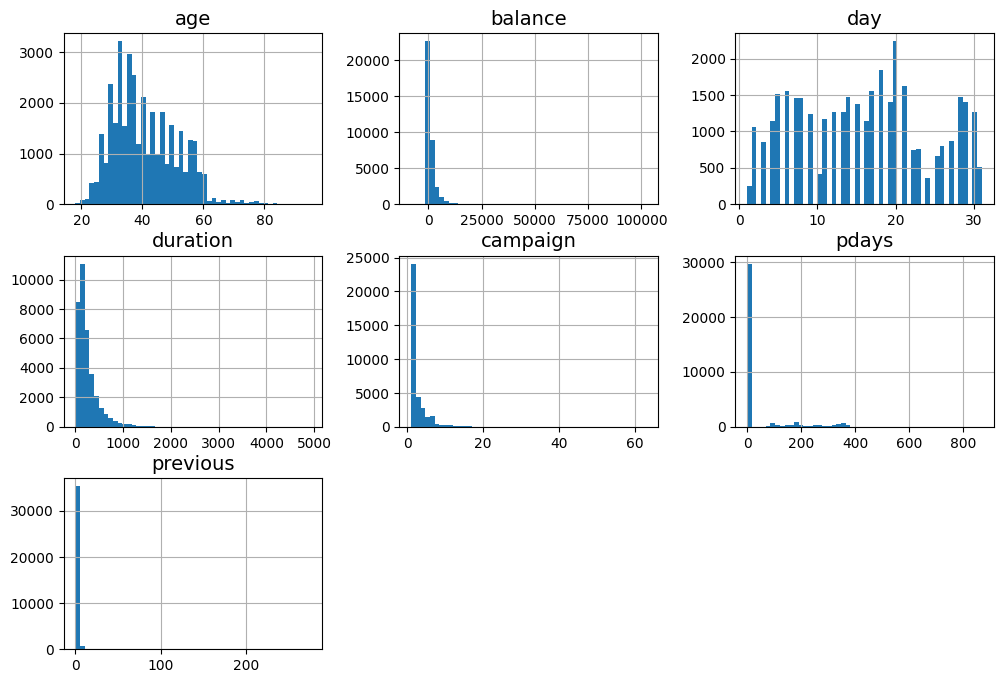

In [56]:
train_set.hist(bins=50, figsize=(12, 8))
plt.show()

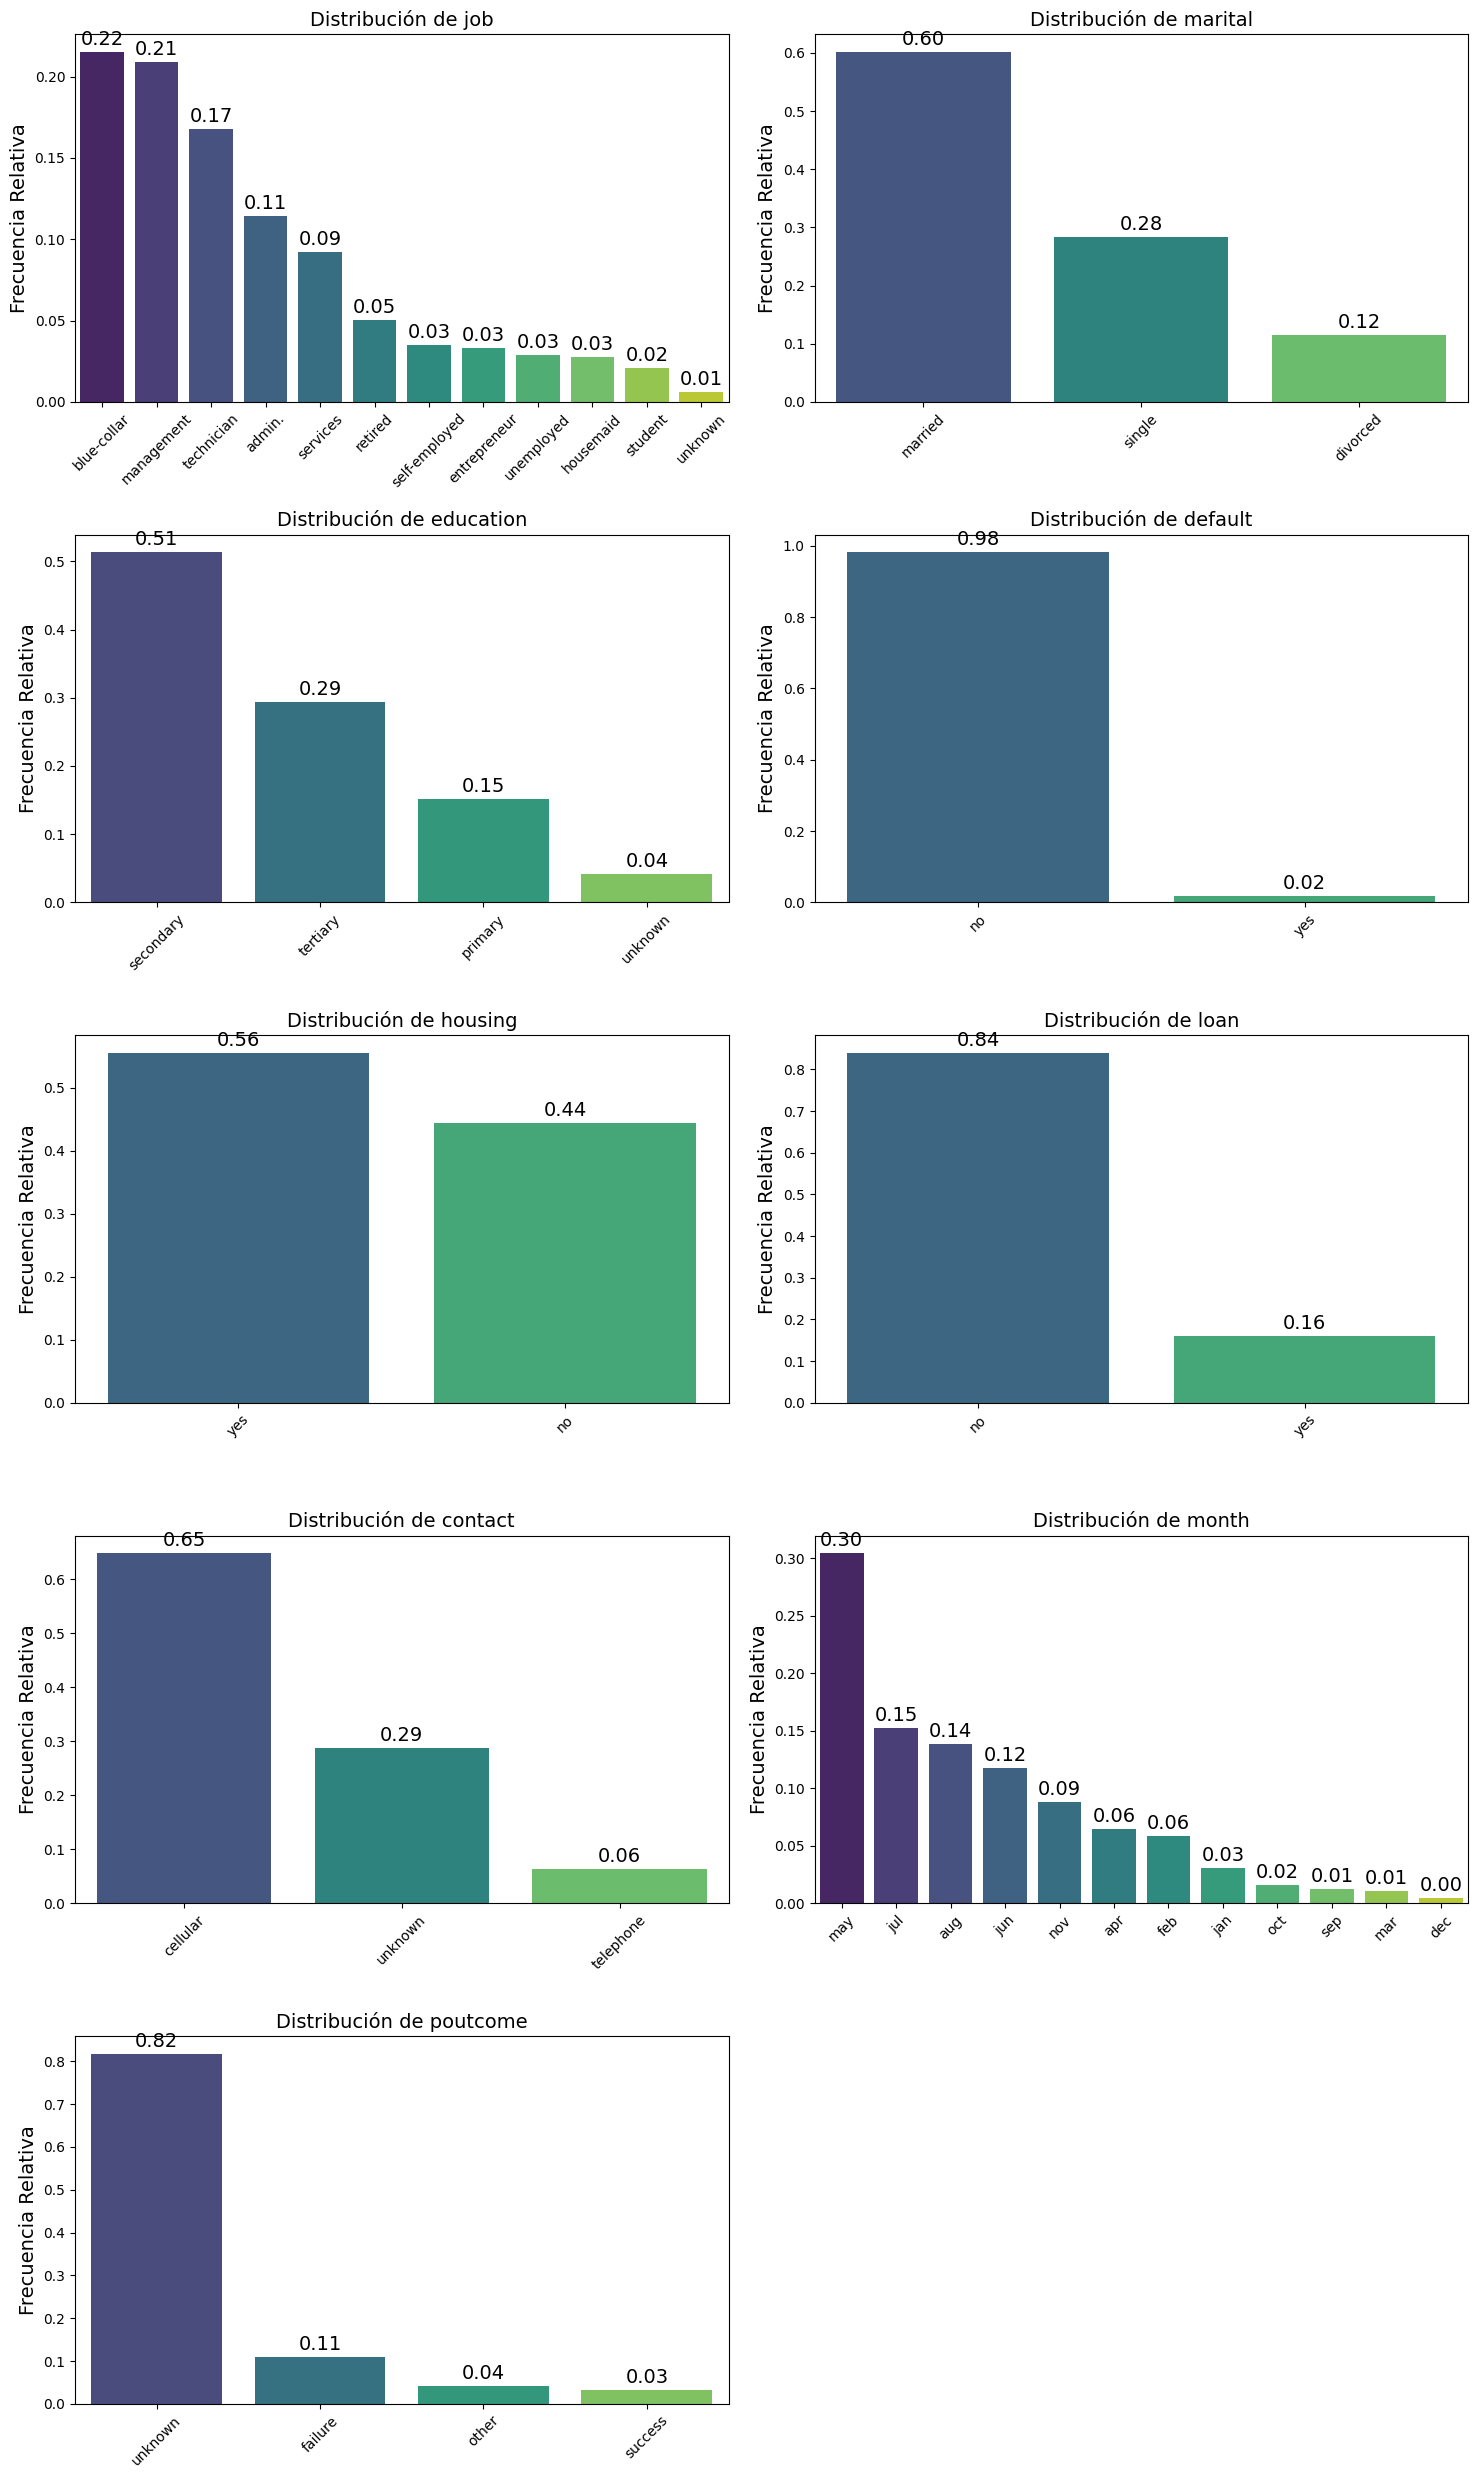

In [59]:
pinta_distribucion_categoricas(df, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], relativa= True, mostrar_valores=True)

In [62]:
categorias_job =[['blue-collar', 'management', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']]
ordinal = OrdinalEncoder(categories=categorias_job)
train_set['ordinal_job'] = ordinal.fit_transform(train_set[['job']])

In [66]:
categorias_marital =[['married', 'single', 'divorced']]
ordinal = OrdinalEncoder(categories=categorias_marital)
train_set['ordinal_marital'] = ordinal.fit_transform(train_set[['marital']])

In [67]:
categorias_education =[['unknown', 'primary', 'secondary', 'tertiary']]
ordinal = OrdinalEncoder(categories=categorias_education)
train_set['ordinal_education'] = ordinal.fit_transform(train_set[['education']])

In [68]:
categorias_default =[['no', 'yes']]
ordinal = OrdinalEncoder(categories=categorias_default)
train_set['ordinal_default'] = ordinal.fit_transform(train_set[['default']])

In [69]:
categorias_housing =[['no', 'yes']]
ordinal = OrdinalEncoder(categories=categorias_housing)
train_set['ordinal_housing'] = ordinal.fit_transform(train_set[['housing']])

In [70]:
categorias_loan =[['no', 'yes']]
ordinal = OrdinalEncoder(categories=categorias_loan)
train_set['ordinal_loan'] = ordinal.fit_transform(train_set[['loan']])

In [71]:
categorias_contact =[['unknown', 'telephone', 'cellular']]
ordinal = OrdinalEncoder(categories=categorias_contact)
train_set['ordinal_contact'] = ordinal.fit_transform(train_set[['contact']])

In [73]:
categorias_month =[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
ordinal = OrdinalEncoder(categories=categorias_month)
train_set['ordinal_month'] = ordinal.fit_transform(train_set[['month']])

In [75]:
categorias_poutcome =[['unknown', 'other', 'failure', 'success']]
ordinal = OrdinalEncoder(categories=categorias_poutcome)
train_set['ordinal_poutcome'] = ordinal.fit_transform(train_set[['poutcome']])

In [78]:
target =[['no', 'yes']]
ordinal = OrdinalEncoder(categories=target)
train_set['target'] = ordinal.fit_transform(train_set[['y']])

In [79]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                36168 non-null  int64  
 1   job                36168 non-null  object 
 2   marital            36168 non-null  object 
 3   education          36168 non-null  object 
 4   default            36168 non-null  object 
 5   balance            36168 non-null  int64  
 6   housing            36168 non-null  object 
 7   loan               36168 non-null  object 
 8   contact            36168 non-null  object 
 9   day                36168 non-null  int64  
 10  month              36168 non-null  object 
 11  duration           36168 non-null  int64  
 12  campaign           36168 non-null  int64  
 13  pdays              36168 non-null  int64  
 14  previous           36168 non-null  int64  
 15  poutcome           36168 non-null  object 
 16  y                  36168

In [77]:
columnas = train_set[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'ordinal_job', 'ordinal_marital',
                      'ordinal_education', 'ordinal_default', 'ordinal_housing', 'ordinal_loan', 'ordinal_contact', 'ordinal_month',
                      'ordinal_poutcome']]

In [80]:
matrix = train_set.corr(numeric_only=True)
matrix['target'].sort_values(ascending=False)

target               1.000000
duration             0.393402
ordinal_poutcome     0.222540
ordinal_contact      0.150066
pdays                0.105742
previous             0.092051
ordinal_job          0.061487
ordinal_education    0.052848
balance              0.052518
ordinal_marital      0.044016
age                  0.026684
ordinal_month        0.024388
ordinal_default     -0.023934
day                 -0.025887
ordinal_loan        -0.066708
campaign            -0.072571
ordinal_housing     -0.140234
Name: target, dtype: float64

In [82]:
features = train_set[['duration', 'ordinal_poutcome', 'ordinal_contact', 'pdays', 'ordinal_housing', 'campaign', 'ordinal_loan']]

In [83]:
tree_classifier = DecisionTreeClassifier()

In [90]:
X_train = features
y_train = train_set['target']

In [91]:
X_train.head()

,duration,ordinal_poutcome,ordinal_contact,pdays,ordinal_housing,campaign,ordinal_loan
3344,72,0.0,0.0,-1,1.0,1,0.0
17965,269,0.0,2.0,-1,1.0,2,0.0
18299,130,0.0,2.0,-1,0.0,4,0.0
10221,375,0.0,0.0,-1,1.0,11,0.0
32192,264,0.0,2.0,-1,0.0,2,0.0


In [92]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()